In [140]:
#-*- coding: utf-8 -*-
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# 将列表中的数据切片读入矩阵
def Read(lines,m,n):
    A = np.zeros((m, n))
    A_row = 0  # 表示矩阵的行，从0行开始
    for line in lines:  # 把lines中的数据逐行读取出来
        list = line.strip('\n').split('\t')  # 处理逐行数据：strip表示把头尾的'\n'去掉，split表示以空格来分割行数据，然后把处理后的行数据返回到list列表中
        A[A_row:] = list[0:5]  # 把处理后的数据放到方阵A中。list[0:4]表示列表的0,1,2,3列数据放到矩阵A中的A_row行
        A_row += 1  # 然后方阵A的下一行接着读
    return A


In [141]:

'''
1.读取训练集和测试集
注:在此处统计行数是为了兼容不同的样本集,
因为理论上说我们事先不会知晓有多少组数据
'''
f1 = open('F:\\Code\\Mode Regonization\\Iris\\Fisher\\train.txt') # 打开训练集
f2 = open('F:\\Code\\Mode Regonization\\Iris\\Fisher\\test.txt') # 打开测试集
lines1 = f1.readlines() # 把全部数据文件读到一个列表lines中
lines2 = f2.readlines()
Line1 = len(lines1) # 读取训练集行数
Line2 = len(lines2) # 读取训练集列数
A = Read(lines1,Line1,5)
B = Read(lines2,Line2,5)

In [142]:
'''
2.将三类样本拆分
'''
# 提取三类训练集
A1,A2,A3 = A[0:25],A[25:50],A[50:75]
# 提取三类测试集
B1,B2,B3 = B[0:25],B[25:50],B[50:75]

A1 = A2
A2 = A3
B1 = B2
B2 = B3

In [143]:
'''
2.去除无用的数据
例如目前需要绘制第一类和第二类的分类面，选取前三个特征进行分类
就需要去除第一行（标签）和第五行的数据（第四个特征）
'''
A1 = np.delete(A1,[0,4],axis=1)
A2 = np.delete(A2,[0,4],axis=1)
a1,a2 = A1,A2 # 寄存后续绘制散点图使用

In [144]:
'''
3.样本增广化、规范化处理
'''
#样本增广化
One = np.ones(25) # 1*25的行向量值均为1
A1 = np.insert(A1,0,values=One,axis=1) # 在第0列插入One向量（变成了列向量）
A2 = np.insert(A2,0,values=One,axis=1)
#样本规范化
A = np.concatenate((A1,-1*A2),axis=0) # A1与A2矩阵拼接在一起
# print(A)


In [145]:
'''
4.采用最小平方误差判别进行运算
w = np.linalg.pinv(X_b).dot(y)
'''
b = 1*np.mat(np.ones((50,1)))
w = np.mat(np.ones((4,1)))
k = 0 # 迭代次数
p = 0.01 # 学习率
xi = 1 # 误差灵敏度
n_interations = 1000 # 迭代次数
i = 0 # 目前在用第i个数据检验正确性
A = np.mat(A)
gradients = np.dot((b[i].A-np.dot(w.transpose(),A[i:i+1].transpose())).A,A[i:i+1])
print(gradients)
print(0.1*gradients)
print("hhhhh")
'''开始迭代！！'''
for k in range(n_interations):
    gradients = np.dot((b[i].A-np.dot(w.transpose(),A[i:i+1].transpose())).A,A[i:i+1])
    # gradients = np.dot(np.mat(A[i:i+1]).transpose(),np.dot(np.mat(A[i:i+1]),w)-b[i]) # 计算样本梯度
    # J = np.sum(2*gradients)
    print(gradients)
    
    w = w - p * gradients.transpose()
    # print("第%d次迭代中,求解惩罚值为%d"%(k+1,J))
    print("更新权向量值为:",w.transpose())
    # print(w.transpose)
    # '''判断是否迭代完毕'''
    # if abs(J)<=xi:
    #     print("迭代完毕！")
    #     break
    '''下一轮的迭代'''
    i = (i + 1) % 50
print("经过%d次迭代后找到最终权向量求解值为:"%(k+1),w.transpose())



[[ -14.9  -104.3   -47.68  -70.03]]
[[ -1.49  -10.43   -4.768  -7.003]]
hhhhh
[[ -14.9  -104.3   -47.68  -70.03]]
更新权向量值为: [[1.149  2.043  1.4768 1.7003]]
[[ -25.60131  -163.848384  -81.924192 -115.205895]]
更新权向量值为: [[1.4050131  3.68148384 2.29604192 2.85235895]]
[[ -46.9015404  -323.62062878 -145.39477525 -229.81754797]]
更新权向量值为: [[1.8740285  6.91769013 3.74998967 5.15053443]]
[[ -68.14843817 -374.81640995 -156.7414078  -272.59375269]]
更新权向量值为: [[ 2.55551289 10.66585423  5.31740375  7.87647196]]
[[-122.00406687 -793.02643462 -341.61138722 -561.21870758]]
更新权向量值为: [[ 3.77555355 18.59611857  8.73351762 13.48865903]]
[[ -193.92624441 -1105.37959315  -542.99348436  -872.66809986]]
更新权向量值为: [[ 5.714816   29.64991451 14.16345247 22.21534003]]
[[ -342.66076867 -2158.76284259 -1130.7805366  -1610.50561273]]
更新权向量值为: [[ 9.14142369 51.23754293 25.47125783 38.32039616]]
[[ -446.79371017 -2189.28917982 -1072.3049044  -1474.41924355]]
更新权向量值为: [[13.60936079 73.13043473 36.19430688 53.06458859]]
[[

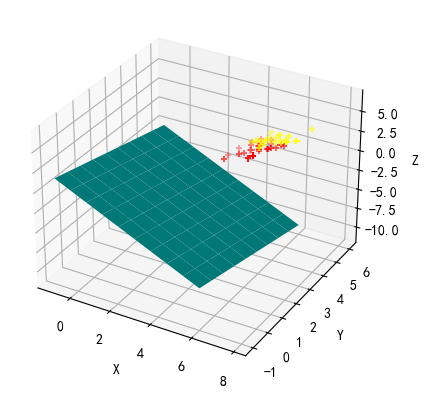

In [146]:
'''
5.对训练数据绘制散点图
绘制分类面
三个特征的权向量格式为w=[w0,w1,w2,w3]
则可得分类面方程为 : w1*x + w2*y + w3*z + w0 = 0
推导可得 -w3*z = w1*x + w2*y + w0
z = -(w1*x + w2*y + w0)/w3
'''
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
point1 = ax.scatter3D(a1[:,0].tolist(),a1[:,1].tolist(),a1[:,2].tolist(),c='red',marker = '+')  # type: ignore
point2 = ax.scatter3D(a2[:,0].tolist(),a2[:,1].tolist(),a2[:,2].tolist(),c='yellow',marker = '+')  # type: ignore
x = np.linspace(-1,6,10)
y = np.linspace(-1,6,10)
X,Y = np.meshgrid(x,y)
w = w.A # 矩阵单个元素也属于一个独立矩阵，因此将matrix矩阵类型转为ndarray
Z = -1*(w[1]*X+w[2]*Y+w[0])/w[3]
ax.plot_surface(X,Y,Z,color='aqua')  # type: ignore
ax.set(xlabel="X", ylabel="Y", zlabel="Z")
# m = w.A
# m = np.mat(m)
# print(m)
plt.show()

In [147]:
# 计算准确率
def count_accuracy(true,false,id,Id):
    if id==Id:
        true+=1
    else:
        false+=1
    return true,false
'''
6.使用导入的测试集进行检验
'''
del_line = 4
ID = [1,2]
flag = 1;
true,false =0,0
# 去除无用的数据
B1 = np.delete(B1,del_line,axis=1)
B2 = np.delete(B2,del_line,axis=1)
# 样本增广化处理
One = np.ones(25) # 1*25的行向量值均为1
B1 = np.insert(B1,1,values=One,axis=1)
B2 = np.insert(B2,1,values=One,axis=1)
B = np.concatenate((B1,B2),axis=0) # B1与B2矩阵拼接在一起
res1,res2 = [],[]
for i in range(0,50):
    B_row = B[i] # 取出第i行
    id = B_row[0] # 取出测试集实际标号
    B_row = np.delete(B_row,0) # 矩阵中删除类别号
    y = np.dot(B_row,w)
    if y > 0:
        res1.append(B_row)
        Id = ID[0]
    else:
        res2.append(B_row)
        Id = ID[1]
    true,false = count_accuracy(true,false,id,Id)
if flag==1:
    str='感知器批处理方法'
elif flag==2:
    str='感知器单步处理方法'
else:
    str='感知器最小平方误差判别方法'
print("基于%s对第%d类和第%d类进行分类："%(str,ID[0],ID[1]))
print("正确个数：",true)
print("错误个数：",false)
print("准确率：",true/(true+false),'\n')

基于感知器批处理方法对第1类和第2类进行分类：
正确个数： 0
错误个数： 50
准确率： 0.0 

